The goal of time series forecasting is to make accurate predictions about the future. The fast and powerful methods that we rely on in machine learning, such as using __train-test splits and k-fold cross-validation, do not work in the case of time series data__. This is because they ignore
the temporal components inherent in the problem. In this tutorial, you will discover how to evaluate machine learning models on time series data with Python. In the field of time series forecasting, this is called backtesting or hindcasting.

Model Evaluation:

1. Train-Test split that respect temporal order of observations.
2. Multiple Train-Test splits that respect temporal order of observations.
3. __Walk-Forward Validation__ where a model may be updated each time step new data is received.

__Block split__ makes sense in ts rather than random split.

In [10]:
import pandas as pd
sunspots = pd.read_csv(r"./data/sunspots.csv",sep='\t')

In [13]:
dates = pd.date_range(start="1749-01-01",freq='M',periods=len(sunspots))
sunspots.index= dates

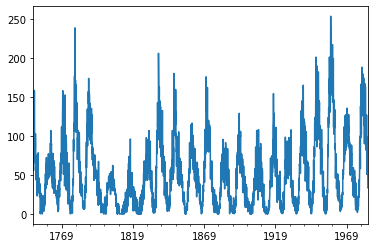

In [14]:
sunspots['value'].plot()

In [19]:
def block_split(df,frac=0.7,print_size=True):
    """
    Block split based on population dataset
    into train and test split.
    frac is the fraction of data in train
    set and 1 - frac data in test
    """
    train = df.iloc[:int(len(df)*frac)]
    test = df[~df.index.isin(train.index)]
    if print_size:
        print("# Population Observarions : {} ".format(len(df)))
        print("# Train      Observations : {} ".format(len(train)))
        print("# Test       Observarions : {} ".format(len(test)))
    return train,test

In [21]:
train,test = block_split(sunspots,.66)

# Population Observarions : 2820 
# Train      Observations : 1861 
# Test       Observarions : 959 


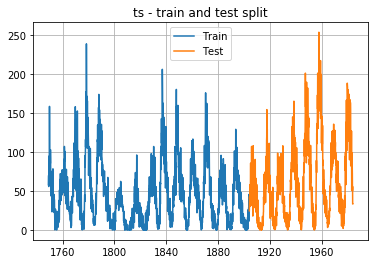

In [53]:
import matplotlib.pyplot as plt
def plot_train_test(train,test):
    plt.plot(train);plt.plot(test)
    plt.grid(True)
    plt.title("ts - train and test split")
    _ = plt.legend(['Train','Test'])
plot_train_test(train.value,test.value)

### Multiple Train-Test Splits
We can repeat the process of splitting the time series into train and test sets multiple times.

In [32]:
from sklearn.model_selection import TimeSeriesSplit

In [50]:
tscv = TimeSeriesSplit()

In [49]:
indices = list(tscv.split(sunspots.value))

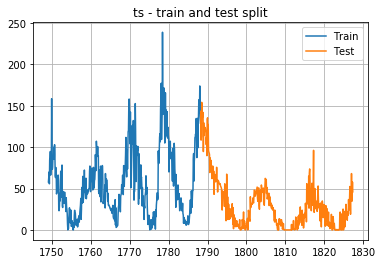

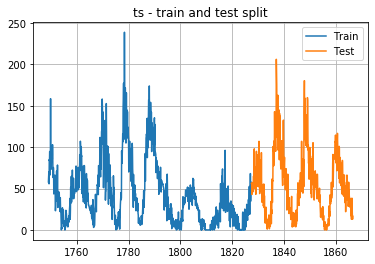

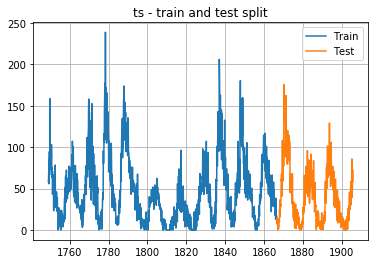

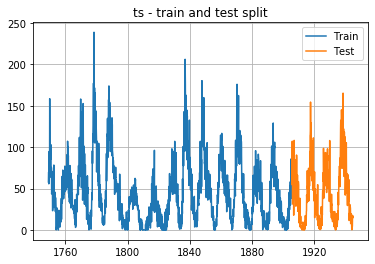

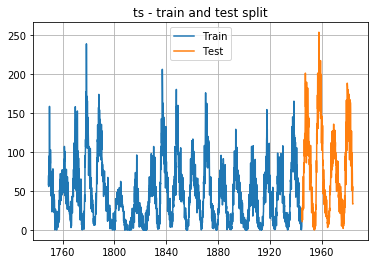

In [81]:
for ind,step in enumerate(indices):
    plt.figure()
    train_index,test_index = step[0],step[1]
    train = sunspots.iloc[train_index]['value']
    test  = sunspots.iloc[test_index]['value']
    plot_train_test(train,test)

## Walk  Forward Validation

It is the gold standard of testing in ts forecasting.

## Summary
- About the importance of evaluating the performance of models on unseen or out-of-sample data.
- How to create train-test splits of time series data, and how to create multiple such splits automatically.
- How to use walk-forward validation to provide the most realistic test harness for evaluating your models.
